In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

from utils import read_csv_mp, plot_class_freq
from config import X_TRAIN_MP, Y_TRAIN_PATH

In [2]:
X_train = read_csv_mp(X_TRAIN_MP, asarray=True)
X_train.shape

(464, 482739)

In [2]:
y_train = pd.read_csv(Y_TRAIN_PATH, header=None)
y_train.shape

(464, 1)

# Class frequency breakdown

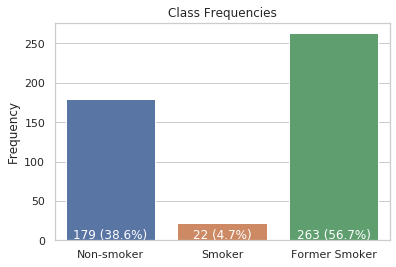

In [3]:
plot_class_freq(y_train)

# Variances of (normalized, not standardized) features

In [5]:
X_norm = MinMaxScaler().fit_transform(X_train)
X_vars = np.var(X_norm, axis=0)
X_vars.shape

(482739,)

array([0.00186623, 0.00591637, 0.0099665 , 0.01401664, 0.01806677,
       0.0221169 , 0.02616704, 0.03021717, 0.03426731, 0.03831744,
       0.04236757, 0.04641771, 0.05046784, 0.05451797, 0.05856811,
       0.06261824, 0.06666838, 0.07071851, 0.07476864, 0.07881878,
       0.08286891, 0.08691905, 0.09096918, 0.09501931, 0.09906945,
       0.10311958, 0.10716972, 0.11121985, 0.11526998, 0.11932012,
       0.12337025, 0.12742038, 0.13147052, 0.13552065, 0.13957079,
       0.14362092, 0.14767106, 0.1517212 , 0.15577132, 0.15982145,
       0.16387159, 0.16792172, 0.17197186, 0.176022  , 0.18007213,
       0.18412226, 0.18817239, 0.19222252, 0.19627266, 0.20032279,
       0.20437293], dtype=float32)

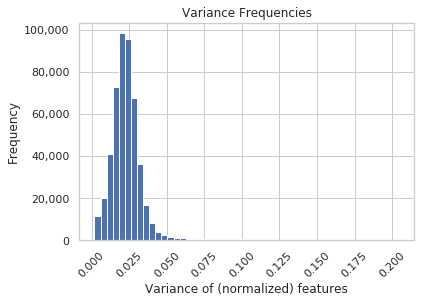

In [6]:
sns.set(style='whitegrid')
ax = plt.figure().add_subplot()
n, bins, patches = ax.hist(X_vars, 50)

ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda y, p: f"{int(y):,}"))
plt.xticks(rotation=45)
plt.xlabel('Variance of (normalized) features')
plt.ylabel('Frequency')
plt.title('Variance Frequencies')
bins

# Feature distributions

In [4]:
def plot_features(X, num_rows=33, num_cols=3, random_state=0):
    np.random.seed(random_state)
    features = np.random.choice(X.shape[1], size=num_rows*num_cols)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))

    for i, feat in enumerate(features):
        row, col = divmod(i, num_cols)
        ax = sns.histplot(ax=axes[row][col], data=X[:,feat], stat='probability')
        ax.set(xlabel=feat)
        plt.xlim(0, 1)

### Untouched (albeit normalized) data

In [37]:
X_norm = MinMaxScaler().fit_transform(X_train)

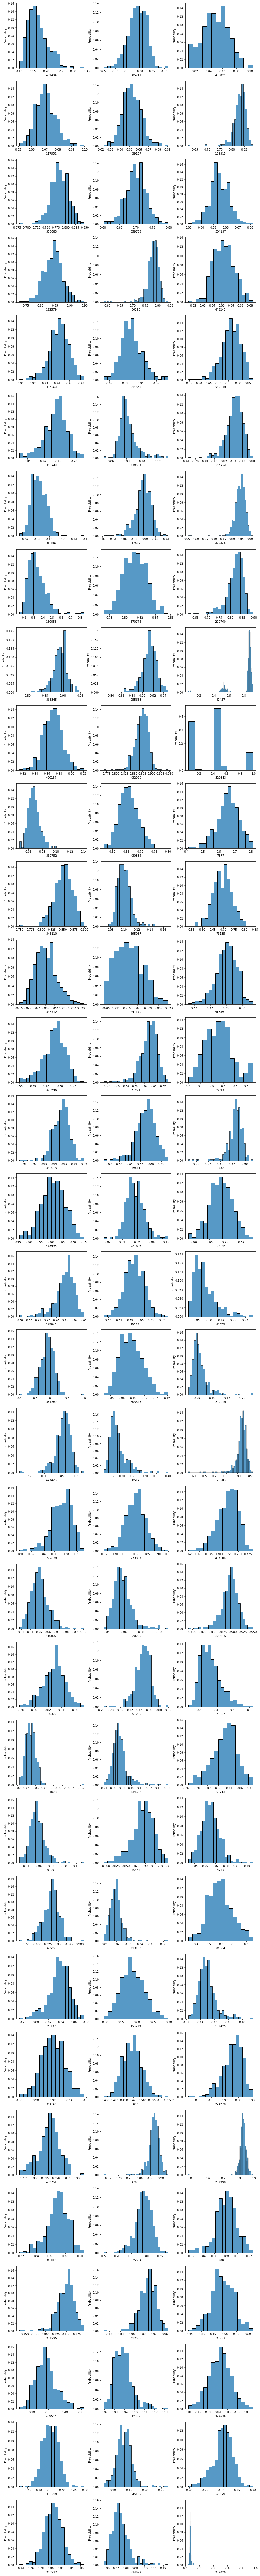

In [5]:
plot_features(X_train) #(X_norm)

### "VarianceThreshold-ed" data

In [51]:
X_varthresh = VarianceThreshold(threshold=0.1).fit_transform(X_norm)

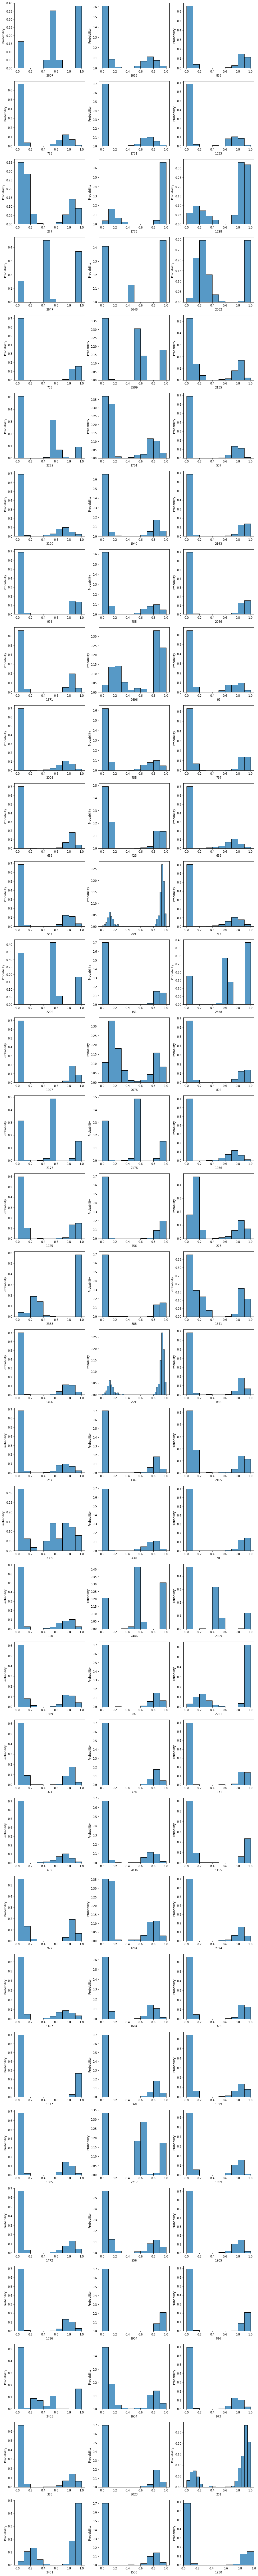

In [52]:
plot_features(X_varthresh)